In [1]:
# Librerías de Álgebra Lineal y Manipulación de Datos
import numpy as np  # Álgebra lineal y operaciones matemáticas de arrays multidimensionales
import pandas as pd  # Manipulación y análisis de datos estructurados en DataFrames

# Librerías de Visualización
import matplotlib.pyplot as plt  # Visualización de datos con gráficos estáticos
import seaborn as sns  # Visualización de datos estadísticos avanzada, basada en matplotlib
import matplotlib.cm as cm  # Manejo de colormaps (mapas de color) en gráficos

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split  # División de los datos en conjuntos de entrenamiento y prueba
from sklearn.cluster import KMeans  # Algoritmo de clustering basado en partición (K-Means)
from sklearn.cluster import DBSCAN  # Algoritmo de clustering basado en densidad (DBSCAN)
from sklearn.preprocessing import StandardScaler  # Estandarización de datos (ajuste de media y varianza)
from sklearn.decomposition import PCA  # Análisis de Componentes Principales (reducción de dimensionalidad)

# Librerías de Métricas y Evaluación
from sklearn.metrics import mean_squared_error, r2_score  # Métricas para evaluar la regresión: error cuadrático medio y R^2
from sklearn.metrics import silhouette_samples  # Puntuaciones individuales de silueta para evaluar clustering
from sklearn.metrics import silhouette_score  # Puntuación general de silueta para evaluar la calidad del clustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Matriz de confusión y su visualización
from sklearn.metrics import accuracy_score  # Métrica para calcular la precisión (accuracy) de un modelo

# Librerías Estadísticas
from scipy.stats import mode  # Cálculo de la moda (valor más frecuente) en una distribución

In [2]:
# Leer archivo CSV
dataset = pd.read_csv('C:/Users/user/Desktop/Practica Python/CBC data_for_meandeley_csv_01052023.csv')

dataset.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,1,28,0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
1,2,41,0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
2,3,40,1,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
3,4,76,0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
4,5,20,1,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [3]:
# Crear una copia del dataset original
dataset_copy_RL = dataset.copy()

In [4]:
# Ver las columnas principales (nombres de las columnas)
print(dataset_copy_RL.columns)

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT /mm3', 'HGB'],
      dtype='object')


In [5]:
# Definir las columnas de características
columns_to_use_RL = ['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']
X = dataset_copy_RL[columns_to_use_RL]

In [6]:
# Ver las primeras filas del dataset
print(dataset_copy_RL.head())

   S. No.  Age  Sex   RBC   PCV   MCV   MCH  MCHC   RDW    TLC  PLT /mm3   HGB
0       1   28    0  5.66  34.0  60.1  17.0  28.2  20.0  11.10     128.3   9.6
1       2   41    0  4.78  44.5  93.1  28.9  31.0  13.0   7.02     419.0  13.8
2       3   40    1  4.65  41.6  89.5  28.8  32.2  13.0   8.09     325.0  13.4
3       4   76    0  4.24  36.7  86.6  26.7  30.8  14.9  13.41     264.0  11.3
4       5   20    1  4.14  36.9  89.1  27.8  31.2  13.2   4.75     196.0  11.5


In [7]:
# Ver la información general del dataset
print(dataset_copy_RL.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S. No.    364 non-null    int64  
 1   Age       364 non-null    int64  
 2   Sex       364 non-null    int64  
 3   RBC       364 non-null    float64
 4   PCV       364 non-null    float64
 5   MCV       364 non-null    float64
 6   MCH       364 non-null    float64
 7   MCHC      364 non-null    float64
 8   RDW       364 non-null    float64
 9   TLC       364 non-null    float64
 10  PLT /mm3  364 non-null    float64
 11  HGB       364 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 34.3 KB
None


In [8]:
# Resumen estadístico del dataset
print(dataset_copy_RL.describe())

           S. No.         Age         Sex         RBC         PCV         MCV  \
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000   
mean   182.500000   44.917582    0.442308    4.278736   36.762912   87.509121   
std    105.221988   18.780854    0.497344    0.820166    6.830835    9.332164   
min      1.000000   11.000000    0.000000    1.360000   13.100000   55.700000   
25%     91.750000   28.000000    0.000000    3.780000   32.900000   83.175000   
50%    182.500000   44.500000    0.000000    4.335000   36.800000   87.950000   
75%    273.250000   60.000000    1.000000    4.800000   41.850000   91.875000   
max    364.000000   89.000000    1.000000    6.900000   56.900000  124.100000   

              MCH        MCHC         RDW         TLC    PLT /mm3         HGB  
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000  
mean    28.227143   32.053407   15.116511    8.863571  223.750824   11.907692  
std      3.865998    2.801790 

In [9]:
# Ver las columnas principales (nombres de las columnas)
print(dataset_copy_RL.columns)

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT /mm3', 'HGB'],
      dtype='object')


In [10]:
# Verificar valores nulos
print(dataset_copy_RL.isnull().sum())

S. No.      0
Age         0
Sex         0
RBC         0
PCV         0
MCV         0
MCH         0
MCHC        0
RDW         0
TLC         0
PLT /mm3    0
HGB         0
dtype: int64


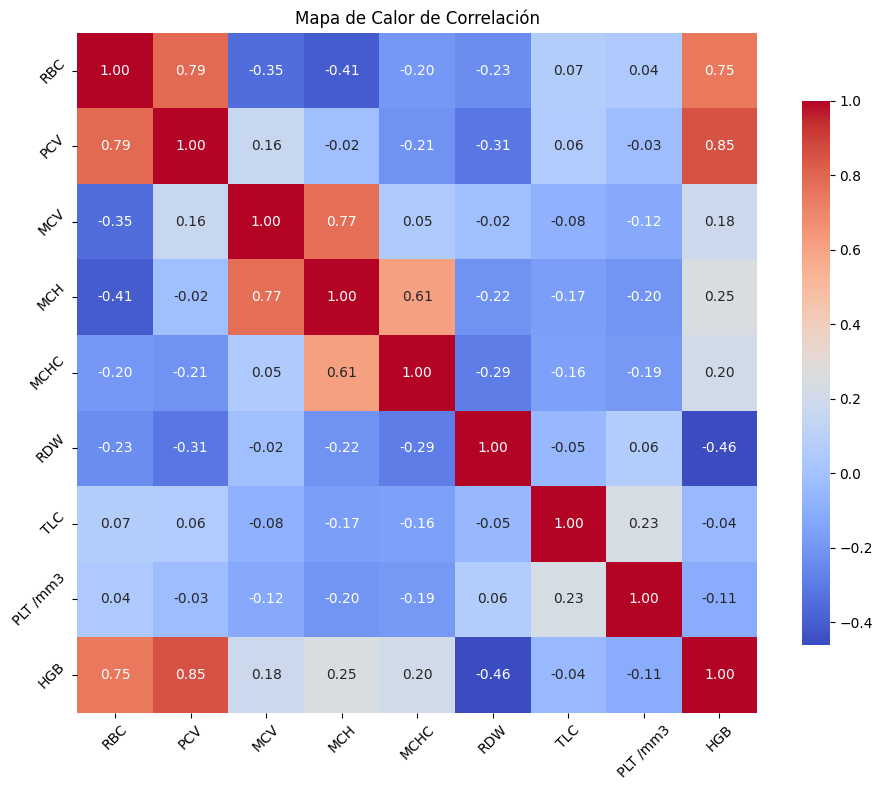

In [11]:
# Eliminar columnas no numéricas
data_numerics = dataset_copy_RL[['RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']]

# Calcular la matriz de correlación
correlation_matrix = data_numerics.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Configurar el título y las etiquetas
plt.title('Mapa de Calor de Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Mostrar el mapa de calor
plt.show()

In [12]:
# Definir las columnas de características (X) y la columna objetivo (y)
X = dataset_copy_RL[columns_to_use_RL]

In [13]:
# Paso 3: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Paso 4: Determinar el número óptimo de clusters usando el método del codo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

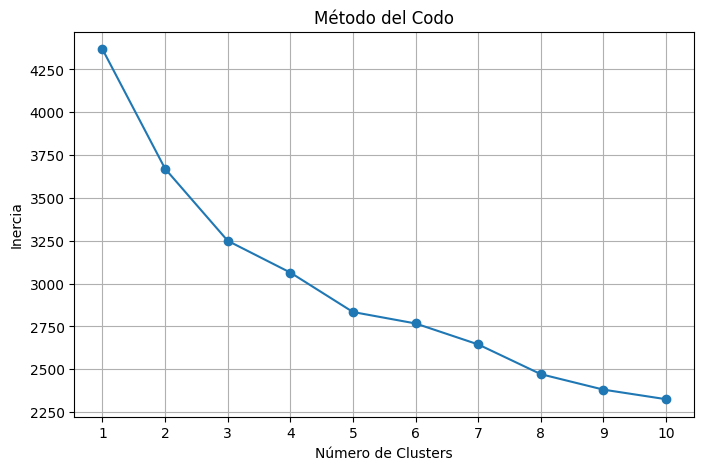

In [15]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [16]:
# Paso 5: Ajustar K-means con el número óptimo de clusters (por ejemplo, 3)
optimal_k = 3  # Cambia este valor según el gráfico del método del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [17]:
# Agregar etiquetas de cluster al dataframe original
dataset_copy_RL['Cluster'] = kmeans.labels_

In [18]:
# Ver las columnas principales (nombres de las columnas)
print(dataset_copy_RL.columns)

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT /mm3', 'HGB', 'Cluster'],
      dtype='object')


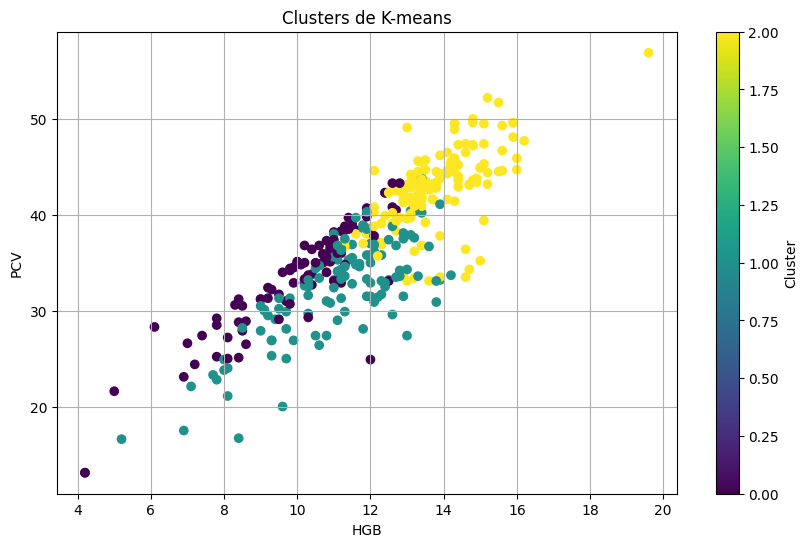

In [19]:
# Paso 6: Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(dataset_copy_RL['HGB'], dataset_copy_RL['PCV'], c=dataset_copy_RL['Cluster'], cmap='viridis')
plt.title('Clusters de K-means')
plt.xlabel('HGB')
plt.ylabel('PCV')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

Observaciones
* Agrupamiento:
Se observa que el algoritmo K-Means ha dividido los datos en tres clusters principales (dado que parece haber tres grupos de colores: púrpura, verde/azul y amarillo).
Los puntos cercanos en el espacio de características HGB-PCV pertenecen a un mismo cluster, lo que sugiere que estos puntos tienen características similares según el algoritmo.


* Distribución de los clusters:
Cluster púrpura: Tiende a agrupar los puntos con valores más bajos de HGB y PCV.
Cluster verde/azul: Representa una región de valores intermedios de HGB y PCV.
Cluster amarillo: Agrupa los puntos con valores más altos de HGB y PCV, indicando una concentración de observaciones que tienen valores elevados de estas dos características.


* Tendencia lineal:
Existe una clara tendencia ascendente en la relación entre HGB y PCV: a medida que aumenta uno, también lo hace el otro. Esto sugiere que las dos variables están correlacionadas, lo que puede tener sentido desde un punto de vista médico o biológico, ya que ambas podrían estar relacionadas con la composición sanguínea.


* El algoritmo ha identificado tres patrones o grupos diferentes de datos que tienen distintos rangos de HGB y PCV.
* Estos grupos podrían representar diferentes estados fisiológicos o clasificaciones de los pacientes, lo que sugiere que los puntos con valores similares de hemoglobina y volumen corpuscular medio tienden a agruparse juntos.

In [20]:
# Calcular el Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.15


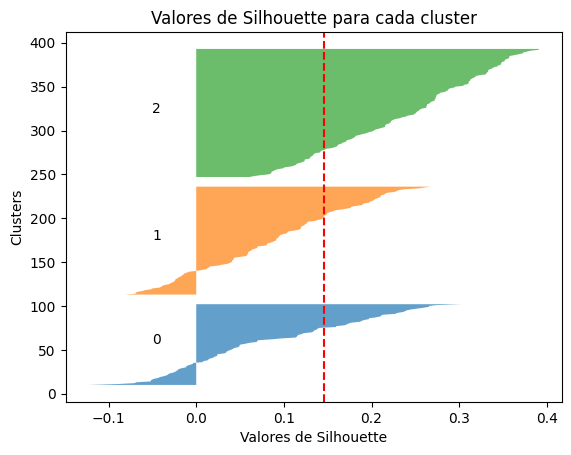

In [21]:
# Calcular las puntuaciones de Silhouette
sample_silhouette_values = silhouette_samples(X_scaled, kmeans.labels_)

# Gráfico de Silhouette
y_lower = 10
for i in range(optimal_k):
    # Agregar las puntuaciones de Silhouette de cada cluster
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower = y_upper + 10  # Espacio entre clusters

plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.title('Valores de Silhouette para cada cluster')
plt.xlabel('Valores de Silhouette')
plt.ylabel('Clusters')
plt.show()

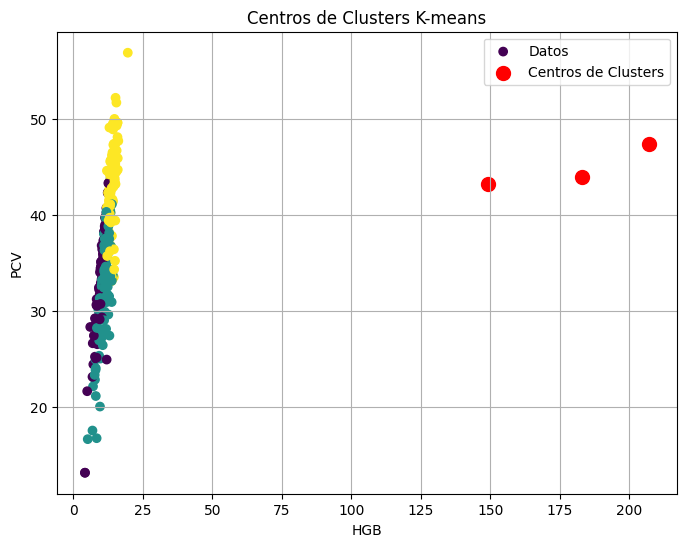

In [22]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Inversamente escalar los centros
plt.figure(figsize=(8, 6))
plt.scatter(dataset_copy_RL['HGB'], dataset_copy_RL['PCV'], c=dataset_copy_RL['Cluster'], cmap='viridis', label='Datos')
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='red', label='Centros de Clusters', marker='o')
plt.title('Centros de Clusters K-means')
plt.xlabel('HGB')
plt.ylabel('PCV')
plt.legend()
plt.grid()
plt.show()

In [23]:
print(dataset_copy_RL.columns)

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT /mm3', 'HGB', 'Cluster'],
      dtype='object')


In [24]:
# Reemplazar 'true_label' con el nombre correcto de la columna
true_labels = dataset_copy_RL['HGB']

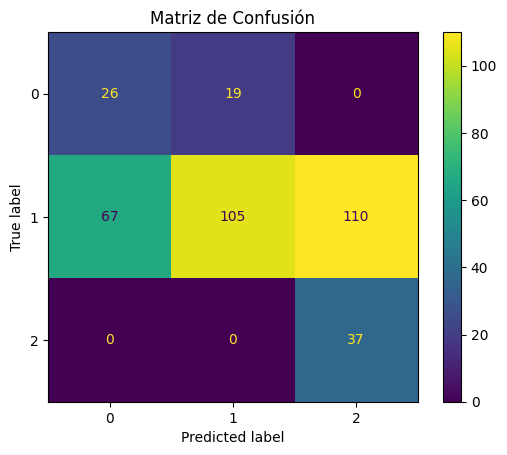

In [25]:
# Convertir true_labels de continuo a categorías discretas usando pd.cut
true_labels_discretized = pd.cut(true_labels, bins=3, labels=[0, 1, 2])  # Modifica 'bins' y 'labels' según sea necesario

# Crear la matriz de confusión
cm = confusion_matrix(true_labels_discretized, kmeans.labels_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusión')
plt.show()

In [26]:
print(true_labels.dtype)
print(kmeans.labels_.dtype)

float64
int32


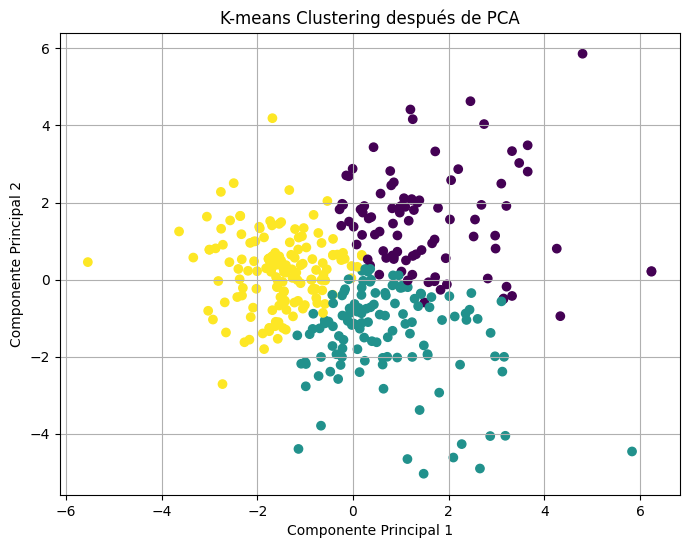

In [27]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering después de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

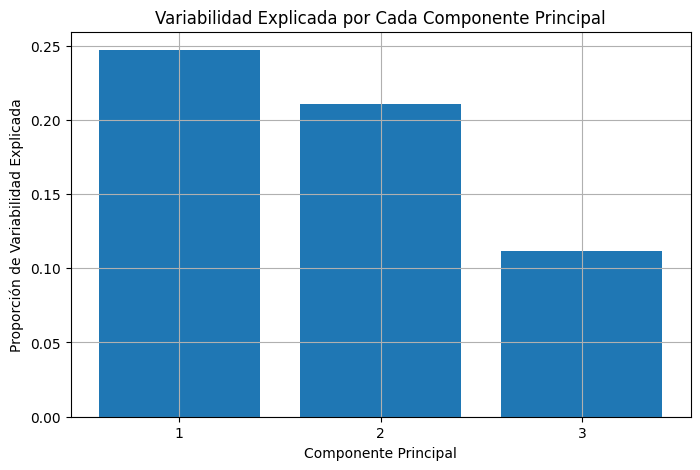

In [28]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Variabilidad Explicada por Cada Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Variabilidad Explicada')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

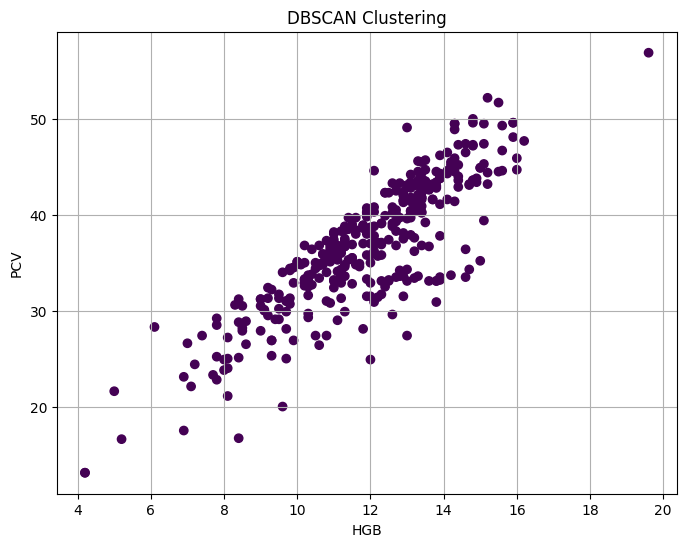

In [29]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualizar resultados de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(dataset_copy_RL['HGB'], dataset_copy_RL['PCV'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('HGB')
plt.ylabel('PCV')
plt.grid()
plt.show()

In [30]:
n_clusters_dbscan = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"Número de clusters detectados por DBSCAN: {n_clusters_dbscan}")

Número de clusters detectados por DBSCAN: 0


In [31]:
print(f'Inercia de K-Means: {kmeans.inertia_}')

Inercia de K-Means: 3249.9265791400408


In [32]:
# Seleccionar las características para entrenar K-Means
features = dataset_copy_RL[['RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']]  # Cambia por tus columnas

In [33]:
silhouette_avg = silhouette_score(features, kmeans.labels_)
print(f'Coeficiente de Silhouette: {silhouette_avg}')

Coeficiente de Silhouette: -0.03954658707166595
